In [88]:
pip install wordcloud numpy pandas matplotlib openpyxl

                                              0.0/250.0 kB ? eta -:--:--
     ------------------------------------- 250.0/250.0 kB 15.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
names = [
    'cnpj_basico', 
    'cnpj_ordem',
    'cnpj_dv',
    'identificador_matriz_filial',
    'nome_fantasia',
    'situacao_cadastral',
    'data_situacao_cadastral',
    'motivo_situacao_cadastral', 
    'cidade_exterior',
    'pais',
    'inicio_atividade',
    'cnae_primario',
    'cnae_secundario',
    'tipo_logradouro',
    'logradouro',
    'numero',
    'complemento',
    'bairro',
    'cep',
    'uf',
    'municipio',
    'ddd_1',
    'telefone_1',
    'ddd_2',
    'telefone_2',
    'ddd_do_fax',
    'fax',
    'email',
    'situacao_especial',
    'data_situacao_especial',
]

estabelecimento = pd.read_csv('estabelecimentos0_conmusic.csv', delimiter=';', encoding='ansi', low_memory=True, names=names)

C:\Users\vinis\AppData\Local\Temp\ipykernel_14644\2841686158.py:34: DtypeWarning: Columns (8,22) have mixed types. Specify dtype option on import or set low_memory=False.
  estabelecimento = pd.read_csv('estabelecimentos0_conmusic.csv', delimiter=';', encoding='ansi', low_memory=True, names=names)


In [66]:
estabelecimento.head(3)

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,cidade_exterior,pais,...,municipio,ddd_1,telefone_1,ddd_2,telefone_2,ddd_do_fax,fax,email,situacao_especial,data_situacao_especial
0,52854294,1,12,1,VN LIMA PRODUCOES E EVENTOS,2,20231110,0,NaN,NaN,...,2633,81.0,99737215,NaN,NaN,NaN,NaN,VNLIMAPRODUCOESEEVENTOS@GMAIL.COM,NaN,NaN
1,52853353,1,38,1,BRAVA BER ESPETARIA LTDA,2,20231110,0,NaN,NaN,...,7107,11.0,47974318,NaN,NaN,NaN,NaN,BRAVABEERESPETARIA@HOTMAIL.COM,NaN,NaN
2,52853326,1,65,1,CASA DAS MENINAS,2,20231110,0,NaN,NaN,...,5875,24.0,33719598,24.0,98175706.0,24.0,33719598.0,CASADASMENINASCHARCUTARIA@GMAIL.COM,NaN,NaN


In [67]:
estabelecimento.shape

(84902, 30)

In [68]:
estabelecimento.dtypes

cnpj_basico                      int64
cnpj_ordem                       int64
cnpj_dv                          int64
identificador_matriz_filial      int64
nome_fantasia                   object
situacao_cadastral               int64
data_situacao_cadastral          int64
motivo_situacao_cadastral        int64
cidade_exterior                 object
pais                           float64
inicio_atividade                 int64
cnae_primario                    int64
cnae_secundario                 object
tipo_logradouro                 object
logradouro                      object
numero                          object
complemento                     object
bairro                          object
cep                            float64
uf                              object
municipio                        int64
ddd_1                          float64
telefone_1                      object
ddd_2                          float64
telefone_2                     float64
ddd_do_fax               

In [69]:
estabelecimento['cnae_primario'] = estabelecimento['cnae_primario'].astype(str)
estabelecimento['cnae_secundario'] = estabelecimento['cnae_secundario'].astype(str)

In [70]:
estabelecimento[['cnae_primario','cnae_secundario']]

,cnae_primario,cnae_secundario
0,9001902,8230001
1,5611205,5611201
2,5611203,5611205
3,5611205,nan
4,9001902,"1830002,5813100,5911101,5911102,5911199,591200..."
...,...,...
84897,9001902,9001903
84898,9493600,9001902
84899,9001902,"9001999,9003500"
84900,5611205,"5320202,5611203,5611204"


In [71]:
estabelecimento = estabelecimento[
    [
        'cnpj_basico', 
        # 'cnpj_ordem',
        # 'cnpj_dv',
        # 'identificador_matriz_filial',
        # 'situacao_cadastral',
        # 'situacao_cadastral',
        # 'data_situacao_cadastral',
        # 'motivo_situacao_cadastral', 
        'cidade_exterior',
        'pais',
        # 'inicio_atividade',
        'cnae_primario',
        'cnae_secundario',
        # 'tipo_logradouro',
        # 'logradouro',
        # 'numero',
        # 'complemento',
        # 'bairro',
        # 'cep',
        'uf',
        'municipio',
        # 'ddd_1',
        # 'telefone_1',
        # 'ddd_2',
        # 'telefone_2',
        # 'ddd_do_fax',
        # 'fax',
        # 'email',
        # 'situacao_especial',
        # 'data_situacao_especial'
    ]
]

In [72]:
df_ecs = estabelecimento.loc[estabelecimento[['cnae_primario']].isin(['5611205']).any(axis=1)] 
df_musicos = estabelecimento.loc[estabelecimento[['cnae_primario']].isin(['9001902']).any(axis=1)] 

In [73]:
qtd_estabelecimetos = df_ecs['uf'].value_counts()
qtd_musicos = df_musicos['uf'].value_counts()

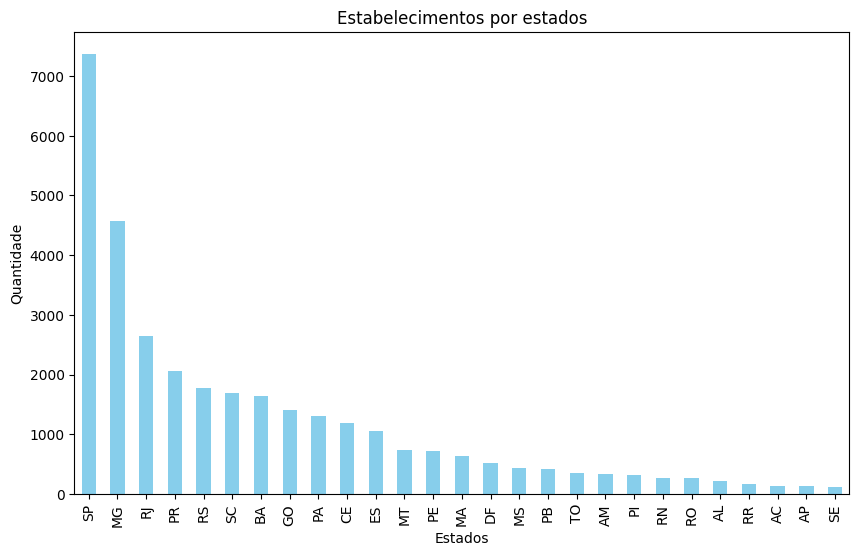

In [74]:
plt.figure(figsize=(10, 6))
qtd_estabelecimetos.plot(kind='bar', color='skyblue')
plt.title('Estabelecimentos por estados')
plt.xlabel('Estados')
plt.ylabel('Quantidade')
plt.show()

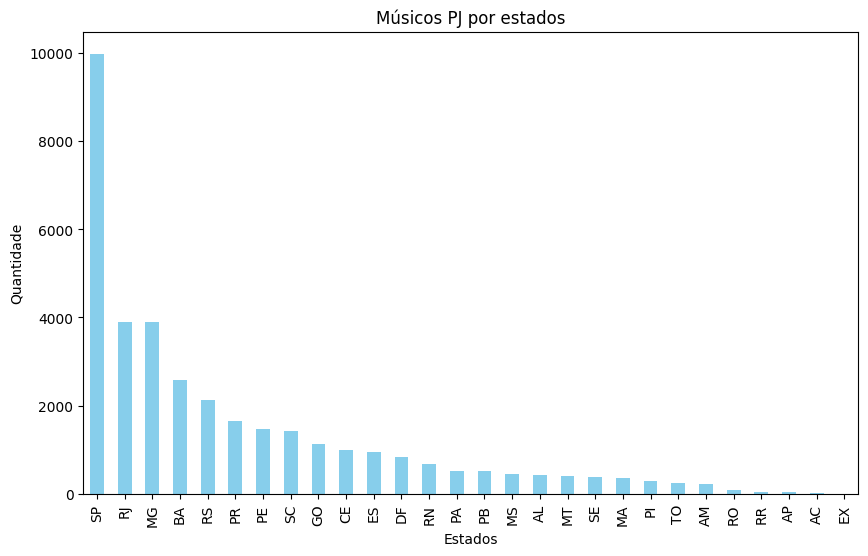

In [75]:
plt.figure(figsize=(10, 6))
qtd_musicos.plot(kind='bar', color='skyblue')
plt.title('Músicos PJ por estados')
plt.xlabel('Estados')
plt.ylabel('Quantidade')
plt.show()

posx and posy should be finite values
posx and posy should be finite values


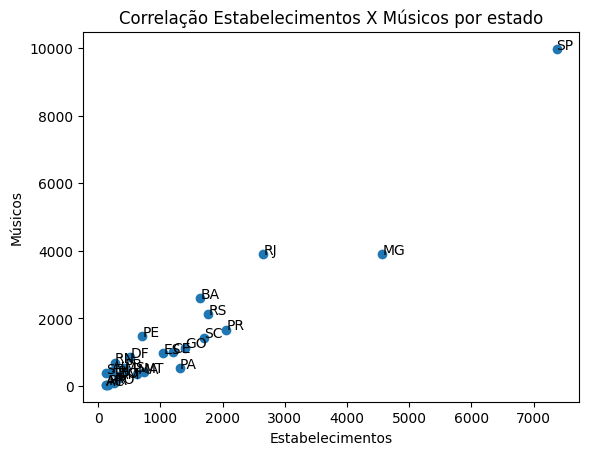

In [86]:
df_qtd_ecs = pd.DataFrame({'uf': qtd_estabelecimetos.index, 'qtd_ecs': qtd_estabelecimetos.values })
df_qtd_musicos = pd.DataFrame({'uf': qtd_musicos.index, 'qtd_musicos': qtd_musicos.values })

df_scatter = pd.merge(df_qtd_ecs, df_qtd_musicos, on='uf', how='outer')

plt.scatter(df_scatter['qtd_ecs'], df_scatter['qtd_musicos'])

for i, row in df_scatter.iterrows():
    plt.text(row['qtd_ecs'], row['qtd_musicos'], row['uf'])

plt.xlabel('Estabelecimentos')
plt.ylabel('Músicos')
plt.title('Correlação Estabelecimentos X Músicos por estado')
plt.show()